In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Data.csv to Data.csv


In [ ]:
import pandas as pd

df = pd.read_csv("Data.csv")  # Use the exact file name
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


✅ Best Params: {'C': 0.7, 'solver': 'liblinear'}

✅ Accuracy Score: 0.8177 (81.77%)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


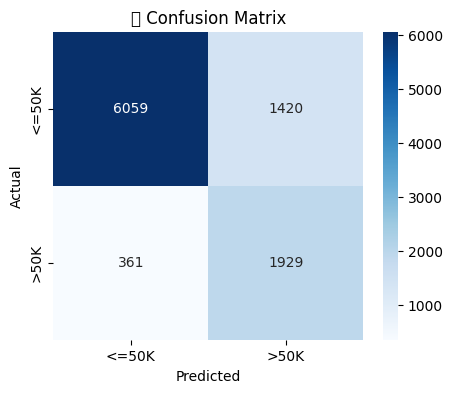


📊 Classification Report:
              precision    recall  f1-score   support

       <=50K       0.94      0.81      0.87      7479
        >50K       0.58      0.84      0.68      2290

    accuracy                           0.82      9769
   macro avg       0.76      0.83      0.78      9769
weighted avg       0.86      0.82      0.83      9769



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


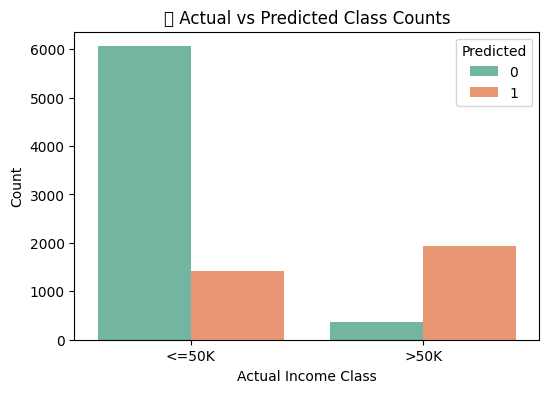

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


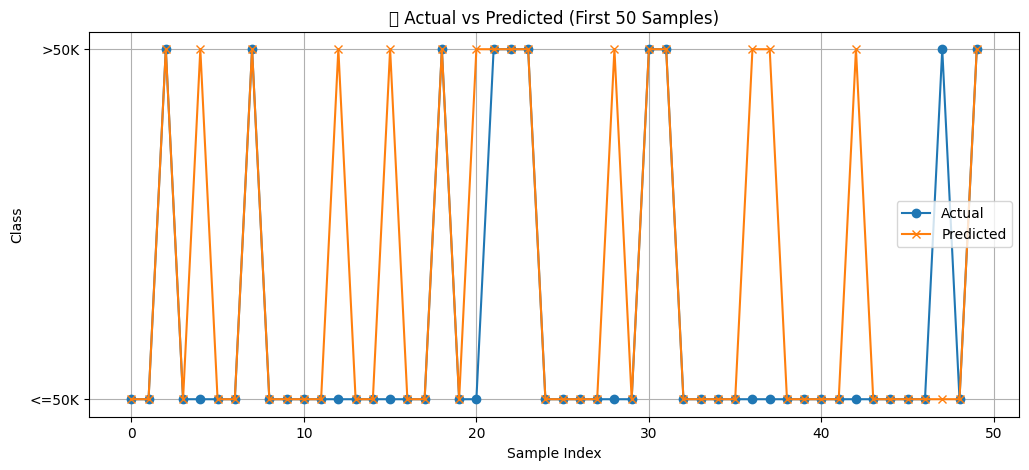

In [16]:
# ✅ Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import joblib

# 📥 Load Data
df = pd.read_csv("Data.csv")

# 🧹 Drop rows with missing values
df.dropna(inplace=True)

# 🧠 Encode gender
df = df[df['gender'].isin(['Male', 'Female'])]
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# 🎯 Encode target
df['income_class'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# 🔍 Feature columns
categorical_cols = ['education', 'occupation', 'workclass', 'marital-status']
numerical_cols = ['age', 'hours-per-week', 'capital-gain', 'capital-loss', 'gender']

# ✅ One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# ✅ Final feature matrix
X = df[numerical_cols + [col for col in df.columns if any(cat in col for cat in categorical_cols)]]
y = df['income_class']

# 🧪 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📈 Handle imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

# 🧪 Grid Search
param_grid = {
    'C': [0.1, 0.7, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train_resampled, y_train_resampled)

model = grid.best_estimator_
print(f"✅ Best Params: {grid.best_params_}")

# 💾 Save model
joblib.dump(model, 'salary_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# 🔮 Predict
y_pred = model.predict(X_test_scaled)

# 🎯 Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy Score: {acc:.4f} ({acc * 100:.2f}%)")

# 🧩 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🧩 Confusion Matrix")
plt.show()

# 📊 Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# 🔢 Actual vs Predicted Bar
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_counts = comparison_df.value_counts().reset_index(name='Count')
plt.figure(figsize=(6, 4))
sns.barplot(data=comparison_counts, x='Actual', y='Count', hue='Predicted', palette='Set2')
plt.title('📊 Actual vs Predicted Class Counts')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.xlabel("Actual Income Class")
plt.ylabel("Count")
plt.show()

# 📉 Line Chart: First 50 samples
sample_plot = comparison_df.reset_index(drop=True).head(50)
plt.figure(figsize=(12, 5))
plt.plot(sample_plot.index, sample_plot['Actual'], label='Actual', marker='o')
plt.plot(sample_plot.index, sample_plot['Predicted'], label='Predicted', marker='x')
plt.title('📉 Actual vs Predicted (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks([0, 1], ['<=50K', '>50K'])
plt.legend()
plt.grid(True)
plt.show()
